# 100 TIMES AI WORLD BUILDING
- このGoogle Colabは、拙著「100 TIMES AI WOLRD BUILDING」にて紹介したワークフローを実際にお手元で試していただくために公開しています
- ファイル > ドライブにコピーを保存　でご自身のGoogle Driveにコピーを保存できます
- [100 TIMES AI WORLD BUILDING - note版](https://note.com/msfmnkns/n/n26ddda02e0d2)

## Latest Version

- [100 TIMES AI WORLD BUILDING v1.2](https://colab.research.google.com/drive/1sDHUERAxX5WovKJZ3xjRbGA5TNJ2QPf1)
  - プロンプトを改善
  - 設定資料出力部分のモデルをClaudeに変更

## 作例
- https://docs.google.com/document/d/1zI9fm2micNvZcGz4y5Jm6dXJhxzDfmbtotBV9vsreb8/edit?tab=t.0

## 概念図

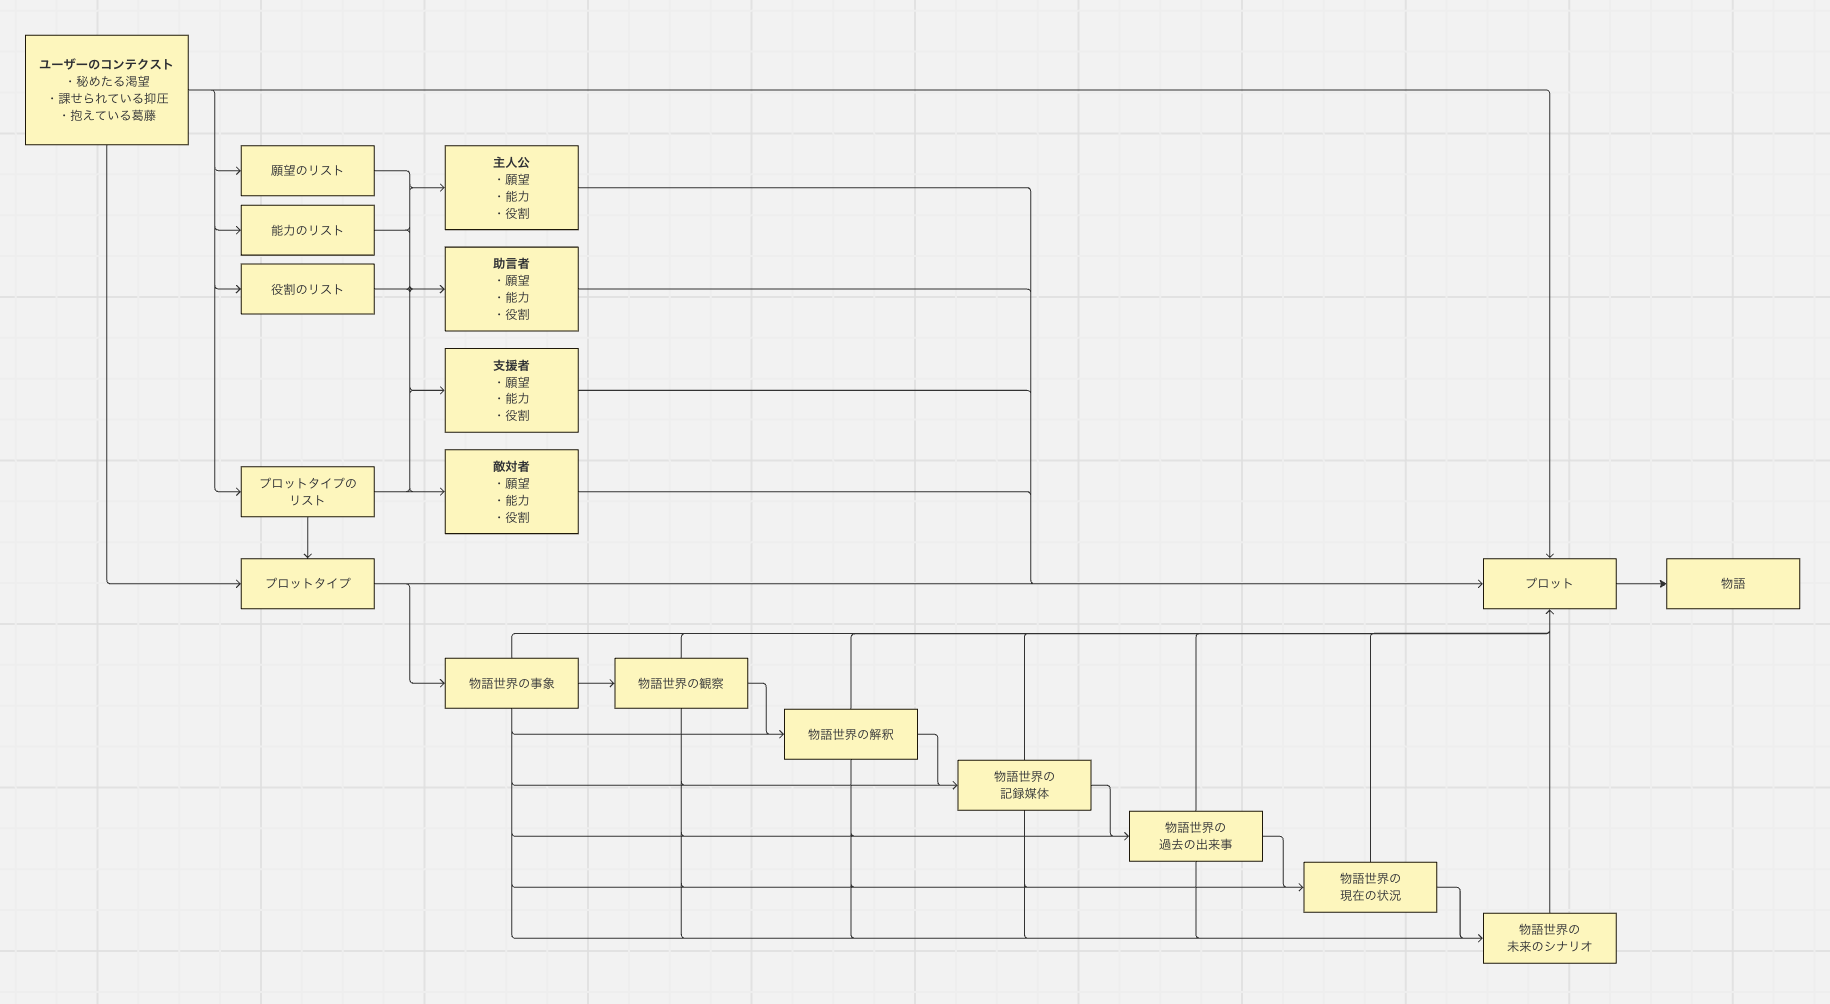

In [ ]:
# インストール
!pip install openai
!pip install anthropic

# ライブラリのインポート
import os
from openai import OpenAI
import random
from IPython.display import display, Markdown
import json
import yaml
import anthropic

# OpenAI API キーの設定
OPENAI_API_KEY= ("<OpenAI API を入力する>")

# Anthropic APIキーの設定
anthropic = anthropic.Anthropic(
    api_key='<Anthropic API を入力する>'
)

# 関数の定義

client = OpenAI(api_key=OPENAI_API_KEY)

def o4(prompt):
    try:
        response = client.chat.completions.create(
            model="o4-mini", #o4-mini #o3
            messages=[
                {"role": "system", "content": "常に日本語で応答します。常にjson形式で応答します。"},
                {"role": "user", "content": prompt},
            ],
            response_format={"type": "json_object"},
        )
          # JSON テキストをパース → Python オブジェクト
        content = response.choices[0].message.content
        data = json.loads(content)

        # Python オブジェクト → YAML 文字列
        return yaml.safe_dump(data, allow_unicode=True)

    except Exception as e:
        return f"エラーが発生しました: {str(e)}"

def o4md(prompt):
    try:
        response = client.responses.create(
            model="o4-mini", #o4-mini #o3
            input=[
                {"role": "system", "content": "常に日本語で応答します。常にMarkdown形式で応答します。"},
                {"role": "user", "content": prompt},
            ],
        )
        return response.output_text

    except Exception as e:
        return f"エラーが発生しました: {str(e)}"

def claude(prompt):
    try:
      message = anthropic.messages.create(
          model="claude-3-7-sonnet-latest", #claude-3-7-sonnet-latest #claude-sonnet-4-20250514 #claude-opus-4-20250514
          max_tokens=16000,
          temperature=1,
          system="常に表現力豊かな日本語で出力します。",
          messages=[
              {
                  "role": "user",
                  "content": [
                      {
                          "type": "text",
                          "text": prompt
                      }
                  ]
              }
          ]
      )
      return message.content[0].text
    except Exception as e:
        return f"エラーが発生しました: {str(e)}"

def data_to_markdown(data, indent=0):
    markdown_lines = []
    # Markdownのリストインデントとして2スペース * indentレベルを使用
    prefix = '  ' * indent + '- '

    if isinstance(data, dict):
        for key, value in data.items():
            # 辞書やリストなど、さらに階層がある場合は再帰処理
            if isinstance(value, (dict, list)):
                markdown_lines.append(f"{prefix}**{key}**:")
                markdown_lines.append(data_to_markdown(value, indent + 1))
            else:
                # それ以外はそのまま表示
                markdown_lines.append(f"{prefix}**{key}**: {value}")

    elif isinstance(data, list):
        for i, value in enumerate(data):
            if isinstance(value, (dict, list)):
                markdown_lines.append(f"{prefix}[{i}]:"+data_to_markdown(value, indent + 1))
            else:
                markdown_lines.append(f"{prefix}[{i}]: {value}")

    else:
        # dictでもlistでもなければ、そのまま出力
        markdown_lines.append(f"{prefix}{data}")

    # 改行で結合して1つの文字列にする
    return "\n".join(markdown_lines)

def rich_print(m):
  display(Markdown(m))

## ユーザーコンテクストを明らかにする

- ユーザーにランダムな質問を投げかけて、ユーザーの持っているコンテクストを明らかにします。
- 下記のGPTを使います。
- ChatGPTの投げかける質問に答えると、ChatGPTがそれを解釈して、ユーザーの持っているコンテクストをまとめて出力するので、下記の変数user_contextに代入してください。

https://chatgpt.com/g/g-68280b3861008191b250b17b7fe76d88-yusanokontekusutowoming-rakanisuru

- 画像からコンテクストを取り出すこともできます。
- 下記のGPTに画像を入力すると、画像が持っているコンテクストをまとめて出力するので、下記の変数user_contextに代入してください。

https://chatgpt.com/g/g-682dc76781808191a29bdf9d5f55ff6d-ru-li-saretahua-xiang-nozhong-yao-nayao-su-toyin-xiang-wochu-li-suru

In [2]:
# ユーザーのコンテクストを変数に代入する

user_context = """

"""


## コンテクストの拡張

In [ ]:
# 願望のリストの生成

desire_list = o4(
    f"""下記のcontextを抽象的に解釈して拡張し、100個のdesire(物語の登場人物が秘めている願望)のリストを出力してください。\n
    context：\n
    ```yaml\n
    {user_context}\n
    ```\n
    """
)

print(desire_list)

# 能力のリストの生成

ability_list = o4(
    f"""下記のcontextを抽象的に解釈して拡張し、100個のability(物語の登場人物が持っている特別な能力または平凡な得意なこと)のリストを出力してください。\n
    context：\n
    ```yaml\n
    {user_context}\n
    ```\n
    """
)

print(ability_list)

# 役割のリストの生成

role_list = o4(
    f"""下記のcontextを抽象的に解釈して拡張し、100個のrole(物語の登場人物が担わなければいけない役割、課されている使命、または職業や身分)のリストを出力してください。\n
    context：\n
    ```yaml\n
    {user_context}\n
    ```\n
    """
)

print(role_list)

# 物語のプロットタイプのリストの生成

plottype_list = o4(
    f"""10個の古今東西の神話伝承やその他創作された物語に見られる典型的な様式をリスト化してください。\n
    リストには下記の要素を含んでください\n

    - plot_type: #プロットタイプの名称\n
    - Core structure: #物語の骨格となる構成要素\n
    - Required events: #プロット成立に必要な最低3つの転換点\n
    - Character requirements: #主要な登場人物に必須の属性・関係性\n
    - Temporal design principles: #時間軸操作の基本ルール\n
    - Types of conflict: #物語全体を駆動する対立構造\n
    - Climax conditions: #決定的瞬間を成立させる要件\n
    - Principles of temp: #緊張緩和のリズム設計\n
    - Typical story setting: #典型的な物語中の時代設定\n
    """
)

print(plottype_list)

# 物語のプロットタイプの生成

plottype = o4(
    f"""物語の根底のテーマとなる重要な文脈を抽象的に解釈して、下記のプロットタイプのリストから適したものをひとつを選んで、出力してください。\n
      リストには下記の要素を含め、必要に応じて拡張または修正してください\n

    - plot_type: #プロットタイプの名称\n
    - Core structure: #物語の骨格となる構成要素\n
    - Required events: #プロット成立に必要な最低3つの転換点\n
    - Character requirements: #主要な登場人物に必須の属性・関係性\n
    - Temporal design principles: #時間軸操作の基本ルール\n
    - Types of conflict: #物語全体を駆動する対立構造\n
    - Climax conditions: #決定的瞬間を成立させる要件\n
    - Principles of temp: #緊張緩和のリズム設計\n

    # 物語の根底のテーマとなる重要な文脈\n
    context：
    ```yaml\n
    {user_context}\n
    ```\n

    #プロットタイプのリスト\n
    plottype_list：
    ```yaml\n
    {plottype_list}\n
    ```\n
    """
)

print(plottype)

# 4人の主要な登場人物の設定の生成

characters_list = o4(
    f"""下記の資料を参照して、characters list（物語の4人の主要な登場人物の詳細な設定資料）を出力してください。\n

    ## 出力形式\n
    ```
    characters list:
    - protagonist: #主人公。物語の中心人物であり、冒険と試練を通じて成長し、変化する存在。内的および外的な葛藤を克服することで、自己実現や世界への貢献を果たす。
      - name: #名前
      - short introduction: #人物像を表す短い紹介文
      - description: #人物像を表す重要な要素や外見的な特徴、人物の魅力を表す詳細な説明
    - messenger: #主人公に知恵や助言を与え、冒険への一歩を踏み出すきっかけを作る存在。成長のための方向性や目的意識を提供する。
      - name: #名前
      - short introduction: #人物像を表す短い紹介文
      - description: #人物像を表す重要な要素や外見的な特徴、人物の魅力を表す詳細な説明
    - supporter: #主人公をサポートしたり、試練を通じて成長を促す存在。時に助け、時に混乱をもたらしながら、主人公に新たな視点や気づきを与える。
      - name: #名前
      - short introduction: #人物像を表す短い紹介文
      - description: #人物像を表す重要な要素や外見的な特徴、人物の魅力を表す詳細な説明
    - adversary: #主人公が克服すべき外的・内的な障害や敵対者。英雄の成長を試す存在であり、恐怖、誘惑、葛藤を象徴する。
      - name: #名前
      - short introduction: #人物像を表す短い紹介文
      - description: #人物像を表す重要な要素や外見的な特徴、人物の魅力を表す詳細な説明
    ```
    \n

    ## 資料\n

    context：#根底のテーマとなる重要な文脈\n
    ```yaml\n
    {user_context}\n
    ```\n

    plottype #プロットタイプ\n
    ```yaml\n
    {plottype}\n
    ```\n

    desire_list #願望のリスト。登場人物ごとにランダムに一つを選択する\n
    ```yaml\n
    {desire_list}\n
    ```\n

    ability_list #能力のリスト。登場人物ごとにランダムに一つを選択する\n
    ```yaml\n
    {ability_list}\n
    ```\n

    role_listt #役割のリスト。登場人物ごとにランダムに一つを選択する\n
    ```yaml\n
    {role_list}\n
    ```\n
    """
)

print(characters_list)

# 物語世界に存在する事象の生成

events = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の事象についての説明文のリストを出力してください。\n
    説明文のリストは、資料の内容を直接引用せず、抽象的概念だけを参考に生成してください。\n
    説明文のリストには下記の要素を含んでください\n
    Space: #物語世界の宇宙空間全体\n
    - Time and space #物語世界の時間と空間についての説明\n
    - Interactions #物語世界の相互作用についての説明\n
    - Quantum fields #物語世界の量子場についての説明\n
    - Entropy #物語世界の情報量についての説明\n
    Earth surface #地上\n
    - Tectonics #物語世界の地殻変動についての説明\n
    - Surface structure #物語世界の地表の成分についての説明\n
    - Surface ecosystems #物語世界の地表の生態系についての説明\n

    # 資料\n

    物語のプロットタイプ\n
    ```yaml\n
    {plottype}\n
    ```\n

    """
)

print(events)

# 物語世界の観測の生成

observation = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の観測についての説明文のリストを出力してください。\n
    説明文のリストには下記の要素を含んでください\n
    Observation: #物語世界の観察のリスト\n
    - Sensory input: #物語世界の感覚入力についての説明\n
    - Measuring devices: #物語世界の測定装置についての説明\n
    - Predictive models: #物語世界の予測モデルについての説明\n
    - Explanatory theories: #物語世界の説明理論についての説明\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n
    """
)

print(observation)

# 物語世界の解釈の生成

interpretation = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の解釈についての説明文のリストを出力してください。\n
    説明文のリストには下記の要素を含んでください\n
    Interpretation: #物語世界の解釈のリスト\n
    - Myths and legends: #物語世界の神話と伝承についての説明\n
    - Geometric and philosophical interpretations: #物語世界の幾何的解釈と哲学的解釈についての説明\n
    - Pietistic interpretations: #物語世界の経験主義的解釈についての説明\n
    - Relativistic and quantum interpretations: #物語世界の相対論的・量子論的解釈についての説明\n
    - Interpretations based on information and calculations: #物語世界の情報と計算にについての説明\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    """
)

print(interpretation)

# 物語世界の記録媒体の生成

media = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の媒体についての説明文のリストを出力してください。\n
    説明文のリストには下記の要素を含んでください\n
    Media: #物語世界の媒体のリスト
    - Biological media: #物語世界の生体媒体（不可視、超高密度、低速の読み書き、複製劣化あり）の説明\n
    - Static inscription media: #物語世界の静的刻記媒体（可視、長期保存、容量は面積依存）の説明\n
    - Static writing media: #物語世界の静的筆記媒体（可視、長期保存、容量は面積依存）の説明\n
    - Analog signal media: #物語世界のアナログ信号媒体（不可視、波形の忠実保存、高速の読み書き、複製劣化あり）の説明\n
    - Digital media: #物語世界のデジタル媒体（不可視、高密度、複製劣化なし、高速の読み書き、機器依存）の説明\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    解釈のリスト\n
    ```yaml\n
    {interpretation}\n
    ```\n

    """
)

print(media)

# 物語世界の過去の重要なイベントの生成

important_past_events = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の有史以来に発生した最も重要な10のできごとのリストを出力してください。\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    解釈のリスト\n
    ```yaml\n
    {interpretation}\n
    ```\n

    記録媒体のリスト\n
    ```yaml\n
    {media}\n
    ```\n
    """
)

print(important_past_events)

# 物語世界の現在の社会構造の生成

social_structure = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の社会構造についての説明文のリストを出力してください。\n
    説明文のリストには下記の要素を含んでください\n

    政治・社会構造\n
    - 国家体制\n
      - 統治形態の種類\n
      - 権力集中度や分権度\n
      - 政策の安定性・変動性\n
      - 国家間の連携・対立状況\n
      - 国内の政治構造（議会、貴族院、軍事組織など）\n
    - 社会階層\n
      - 階層の区分\n
      - 社会流動性の度合い\n
      - 経済・文化資源の分布と集中度\n
      - 社会的信用・評価システム\n
      - 階層間の交流および対立の様相\n
    経済システム\n
    - 通貨・交易\n
      - 通貨の種類、価値安定性、インフレーション率\n
      - 交易ルートの詳細（主要ルート、障害要因、季節変動など）\n
      - 貿易品目および供給チェーンの構造\n
      - 取引の頻度と市場参加者の数\n
      - 貿易規制や税制の影響\n
    - 生産・消費\n
      - 各産業の生産能力（農業、工業、手工業など）\n
      - 資源分布および採取の難易度\n
      - 消費パターンおよび需要変動\n
      - 労働力供給、賃金体系、雇用率\n
      - 生産・流通コストと効率性指標\n
    文化と宗教\n
    - 言語・習慣\n
      - 言語体系、方言、文字体系の多様性\n
      - 習慣や伝統行事の頻度・形式\n
      - 文化的アイデンティティとその変遷\n
      - 文化資産の保存状態と普及度\n
      - 教育機関やメディアによる影響度\n
    - 宗教・信仰\n
      - 宗教体系の構造（多神教、一神教、精霊信仰など）\n
      - 教義、儀式、祭礼の内容と頻度\n
      - 信者数、信仰の拡散率、布教活動の影響力\n
      - 宗教組織の構造、権威、資金源\n
      - 宗教的禁忌・倫理規範の具体的指標\n
    法律と秩序\n
    - 法体系\n
      - 法律の厳格性、柔軟性、適用範囲\n
      - 犯罪種類と発生頻度\n
      - 裁判制度の構造、透明性、公平性\n
      - 罰則の重さ、再犯率、改正履歴\n
      - 社会全体の法遵守意識とその評価\n
    - 治安維持\n
      - 警察・衛兵・民兵等の組織規模と装備\n
      - 治安維持予算、資源投入率\n
      - 犯罪予防対策の成熟度と効果測定\n
      - 市民の安全意識、参加度、通報システム\n
      - 治安指標（犯罪率、交通事故発生率等）\n
    教育と技術\n
    - 教育機関\n
      - 教育機関の種類（学校、図書館、師弟制度等）と規模\n
      - 教育カリキュラム、伝承方法、評価基準\n
      - 学習者数、進学率、成果指標\n
      - 教育予算、資源分配の状況\n
      - 歴史的変遷と制度改正の頻度\n
    - 技術レベル\n
      - 科学技術の進歩指標\n
      - 技術普及率、産業界への導入率\n
      - 技術革新の影響度および持続性\n
      - 産業別技術適用状況と成果\n
      - 政策や国際競争力の評価指標\n
    環境と生態系\n
    - 自然環境\n
      - 地形の種類、分布、標高などの地理情報\n
      - 気候パターン、年平均温度、降水量\n
      - 自然資源の種類と量（鉱物、森林、淡水など）\n
      - 自然保全の施策とその実効性\n
      - 災害発生頻度とリスク評価\n
    - 動植物\n
      - 生物種の種類、固有種の分布、絶滅危惧種の存在\n
      - 生態系内の捕食・共生関係の詳細\n
      - 季節ごとの動植物の変動パターン\n
      - 環境ストレス要因（温度、降水量、病害虫）\n
      - 生物多様性指数および保護措置の効果\n
    インフラと交通\n
    - 交通手段\n
      - 移動手段の種類、運行頻度、速度、信頼性\n
      - 交通網の整備状況とカバレッジ\n
      - 燃料効率、エネルギー消費量、環境負荷\n
      - 事故発生率、安全基準の遵守状況\n
      - 運行コストと利用者数\n
    - インフラ整備\n
      - インフラ施設の種類、規模、耐用年数\n
      - 維持管理コスト、更新頻度、故障率\n
      - インフラ普及率、地域間の格差\n
      - 建設技術や材料の品質指標\n
      - 政策による投資額、補助金の適用状況\n
    生活様式と職業\n
    - 住居・衣食\n
      - 住居タイプ（戸建て、集合住宅、仮設住宅など）の詳細\n
      - 建築様式、使用材料、設備の充実度\n
      - 衣服のデザイン、素材、伝統的な衣装の再現度\n
      - 食文化の構成要素（主食、副菜、調理法、地域特有の食材など）\n
      - 居住環境（温度、湿度、騒音、生活水準など）の評価指標\n
    - 職業・労働\n
      - 職業の種類と分布、雇用率、業種ごとの経済貢献度\n
      - 労働時間、賃金体系、労働条件の詳細\n
      - 職業訓練、スキル習得の機会と教育レベル\n
      - 労働市場の需給バランス、失業率\n
      - 労働組合の影響力と労働法規の遵守状況\n
    コミュニケーションと情報伝達\n
    - メディア\n
      - メディアの種類、普及率、リーチ\n
      - 発信速度、情報の正確性、検証プロセス\n
      - 報道内容の多様性、客観性、編集方針\n
      - 市民のアクセス状況、受容度\n
      - 法的規制、自己規制の状況\n
    - 通信手段\n
      - 通信手段の種類、普及率、伝達速度\n
      - 通信コスト、インフラ整備状況、信頼性\n
      - セキュリティ対策、データ保護のレベル\n
      - 通信ネットワークのカバレッジ、障害発生率\n
      - 技術的アップグレードの周期、利用者数\n
    芸術と娯楽\n
    - 音楽・演劇\n
      - 芸術表現の種類、スタイル、ジャンルの多様性\n
      - 文化イベントの頻度、規模、参加者数\n
      - 芸術家の育成環境、資金援助、評価基準\n
      - 公共施設（劇場、コンサートホール等）の充実度\n
      - 社会的評価、批評システム、文化政策の影響\n
    - スポーツ・ゲーム\n
      - 代表的なスポーツ・ゲームの種類、ルール、競技システム\n
      - 参加者数、観戦者数、経済効果\n
      - イベントの開催頻度、規模、運営体制\n
      - 競技施設の整備状況、安全基準、設備品質\n
      - 競技ルールの改定履歴、公正性指標\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    解釈のリスト\n
    ```yaml\n
    {interpretation}\n
    ```\n

    記録媒体のリスト\n
    ```yaml\n
    {media}\n
    ```\n

    過去の重要なイベントのリスト\n
    ```yaml\n
    {important_past_events}\n
    ```\n

    """
)

print(social_structure)

# 物語世界の現在の生活環境の生成

living_environment = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の生活環境についての説明文のリストを出力してください。\n
    説明文のリストには下記の要素を含んでください\n

    社会的集団・コミュニティ\n
    - 家族形態\n
      - 世帯構成の類型\n
      - 血縁、婚姻関係と扶養責任の強度\n
      - 家族内意思決定構造・家計管理方法\n
      - 世代間交流・同居／近居率・介護分担\n
      - 離婚・再婚・養子縁組の制度と社会的受容\n
    - 地域コミュニティ\n
      - 自治組織形態\n
      - 参加率と自治活動（清掃・防災・祭礼）の頻度\n
      - 互助ネットワークの強度と資源共有の仕組み\n
      - リーダー選出、合意形成手法\n
      - 地域アイデンティティと外部流入者への開放度\n
    - 職業・所属集団\n
      - 雇用形態の種類\n
      - 組織文化・上下関係・福利厚生の特徴\n
      - 労働組合／業界団体の加入率と交渉力\n
      - 異業種交流・社外ネットワーキングの仕組み\n
      - 職場内・業界内での地位付与・表彰制度\n
    趣味・関心\n
    - コミュニティの規模と活動頻度\n
    - 行動規範・モデレーション方針・ハラスメント対策:\n
    - 情報共有様式:\n
    - 維持・運営の資金源:\n
    ライフステージとライフイベント\n
    - 出産施設・助産制度・出生登録手続\n
    - 命名儀式・祝賀慣行\n
    - 出生率\n
    - 産後サポートネットワーク（親族・行政・民間）\n
    - 保育・幼児教育機関の種類と就園率\n
    - 遊び文化\n
    - 友人関係形成\n
    - 成長儀礼\n
    - 成人年齢・通過儀礼の内容\n
    - 進学・就職・技能習得の分岐点と制度\n
    - 恋愛・デート文化とジェンダー規範\n
    - 自立支援\n
    - 危険行動／リスク教育\n
    - キャリア形成・昇進儀礼・表彰制度\n
    - 住宅取得の制度\n
    - 家族内役割再編\n
    - 健康管理\n
    - 地域での社会的貢献活動\n
    - 婚姻制度と手続\n
    - 婚礼儀式の形式・費用・地域差\n
    - 親族間の贈与・儀礼\n
    - 離婚・再婚プロセスと子の監護権\n
    - 妊産婦医療\n
    - 乳幼児養育文化\n
    - 親族・コミュニティによる子育て支援\n
    - 教育投資\n
    - 退職制度・年金・再就職制度\n
    - 介護形態\n
    - 健康寿命\n
    - 高齢者コミュニティ\n
    - 家族間の介護分担\n
    - 看取りと死後事務\n
    - 葬儀形式\n
    - 埋葬形態\n
    - 香典・弔電・供花などの贈与\n
    - 相続\n
    - 家族・親族間のプライバシー\n
    - 家族・親族間の金銭管理\n
    社会的モラル・マナー\n
    - 公共空間のマナー\n
    - 公共での身体距離・プライバシー確保\n
    - 敬語・挨拶・謝罪文化\n
    - 贈答文化\n
    - 会食・接待の作法\n
    - 意見表明と沈黙・察しの文化\n
    社会的役割と地位付与\n
    - 年功序列・長老制・高齢者敬重度\n
    - 市民権・兵役・奉仕義務の要否\n
    - 引退儀礼・隠居文化\n
    - 権威・資源の世代継承方法\n
    ジェンダー役割\n
    - 家事・育児・介護のジェンダー分担\n
    - ジェンダー平等・法的保護\n
    - 多様なジェンダーコミュニティの権利・社会認知\n
    - 服飾・化粧・身体装飾の性差規範\n
    - 差別事例・救済制度\n
    職業・専門家ステータス\n
    - 資格・免許・学位の取得プロセスと難易度\n
    - 専門職団体・ギルド・学会の権威\n
    - 社会的信用・地位\n
    - 功労章・表彰制度・叙勲\n
    - 懲戒制度・職業倫理\n
    宗教・文化的役割\n
    - 聖職者・巫女・行者などの地位と任命儀式\n
    - 文化財守人・家元・世襲芸能の継承\n
    - 年中祭礼の役割者\n
    - 宗教階層の権限差\n
    - 世襲／選挙／試験による地位付与の違い\n
    住環境・生活インフラ\n
    - 持家／賃貸比率・空き家率\n
    - 上下水、エネルギーの供給とマネジメント\n
    - 外食・デリバリーの文化\n
    健康・衛生・安全\n
    - 医療アクセス\n
    - 公衆衛生\n
    - 生活安全\n
    日常行動パターン\n
      - 平均労働時間・通勤時間\n
      - 睡眠時間・家事時間・余暇時間\n
      - 旅行・スポーツへの参加\n
      - 文化施設の利用\n
      - ボランティア・地域活動への参加\n
      - 消費・購買行動\n
      - 決済方法\n
      - メディア接触の頻度\n
      - 遠隔地との交流\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    解釈のリスト\n
    ```yaml\n
    {interpretation}\n
    ```\n

    記録媒体のリスト\n
    ```yaml\n
    {media}\n
    ```\n

    過去の重要なイベントのリスト\n
    ```yaml\n
    {important_past_events}\n
    ```\n

    社会構造のリスト\n
    ```yaml\n
    {social_structure}\n
    ```\n

    """
)

print(living_environment)
# 物語世界の現在の社会的集団の生成

social_groups = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界に存在する10個の社会的集団についての説明文のリストを出力してください。\n
    説明文のリストには下記の要素を含んでください\n

    - 社会的集団の名称\n
    - 構成員の種類と規模\n
    - 目的\n
    - 課題\n
    - 活動\n
    - 特徴等\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    解釈のリスト\n
    ```yaml\n
    {interpretation}\n
    ```\n

    記録媒体のリスト\n
    ```yaml\n
    {media}\n
    ```\n

    過去の重要なイベントのリスト\n
    ```yaml\n
    {important_past_events}\n
    ```\n

    社会構造のリスト\n
    ```yaml\n
    {social_structure}\n
    ```\n

    生活環境のリスト\n
    ```yaml\n
    {living_environment}\n
    ```\n

    """
)

print(social_groups)

people_list = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界に存在する100人の生活者のペルソナリストを出力してください。\n
    ペルソナリストには下記の要素を含んでください\n

  - 氏名\n
  - 年齢\n
  - 性別\n
  - 居住地\n
  - 家族構成\n
  - 所属グループ\n
  - 役割\n
  - 収入\n
  - ライフスタイル\n
  - 休日の過ごし方\n
  - 情報収集方法\n
  - 趣味・興味\n
  - 価値観\n
  - 目標・希望\n
  - 悩み・不満\n
  - 人間関係\n

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    解釈のリスト\n
    ```yaml\n
    {interpretation}\n
    ```\n

    記録媒体のリスト\n
    ```yaml\n
    {media}\n
    ```\n

    過去の重要なイベントのリスト\n
    ```yaml\n
    {important_past_events}\n
    ```\n

    社会構造のリスト\n
    ```yaml\n
    {social_structure}\n
    ```\n

    生活環境のリスト\n
    ```yaml\n
    {living_environment}\n
    ```\n

    社会的集団のリスト\n
    ```yaml\n
    {social_groups}\n
    ```\n

    """
)

print(people_list)

# 物語世界の未来のシナリオの生成
future_scenarios = o4(
    f"""下記の資料を抽象的に解釈して拡張し、物語世界の50年から100年後の未来のシナリオを予測して出力してください。\n
    シナリオのリストには下記の要素を含んでください\n

    - Positive scenarios #楽観的シナリオ\n
    - Negative scenarios #悲観的シナリオ\n
    - Intermediate scenarios #中間のシナリオ\nc

    # 資料\n

    事象のリスト\n
    ```yaml\n
    {events}\n
    ```\n

    観測のリスト\n
    ```yaml\n
    {observation}\n
    ```\n

    解釈のリスト\n
    ```yaml\n
    {interpretation}\n
    ```\n

    記録媒体のリスト\n
    ```yaml\n
    {media}\n
    ```\n

    過去の重要なイベントのリスト\n
    ```yaml\n
    {important_past_events}\n
    ```\n

    社会構造のリスト\n
    ```yaml\n
    {social_structure}\n
    ```\n

    生活環境のリスト\n
    ```yaml\n
    {living_environment}\n
    ```\n

    社会的集団のリスト\n
    ```yaml\n
    {social_groups}\n
    ```\n

    """
)

print(future_scenarios)

# 物語世界のプロットの生成
plot = o4(
    f"""下記の資料を網羅的に分析して再構築し、10章の物語の詳細なプロットを出力してください。\n
    プロットの各章には下記の要素を含んでください\n

    - What is the situation in the story world? #物語世界はどんな状況か\n
    - What events occurred? #何が起こったか\n
    - How did the protagonist feel? #主人公はどのような受動的感情を出いたか\n
    - What intentions and actions did the protagonist show? #主人公はどのような意思と行動を起こしたか\n
    - How did the situation change as a result? #状況はどのように変化したか\n
    - 第1章から第9章までは、章の最後に、次の章につながる伏線を示してください\n
    - 第10章の最後は、必ず物語を締めくくってください\n

    # 根底のテーマとなる重要な文脈\n
    {user_context}\n

    # 物語のプロットタイプ\n
    {plottype}\n

    # 登場人物の情報\n
    {characters_list}\n

    # 資料\n
    {events}\n
    {observation}\n
    {interpretation}\n
    {media}\n
    {important_past_events}\n
    {social_structure}\n
    {living_environment}\n
    {social_groups}\n
    {people_list}\n
    {future_scenarios}\n
    """
)

print(plot)

# plot_1 ～ plot_10 にそれぞれ第n章を代入

for i_1 in range(1, 11):
    # プロンプト
    prompt = f"""下記のプロットから、第{i_1}章部分のテキストのみをYAML形式で返してください。\n
    # プロット
    {plot}
    """

    # 推論
    plot_text = o4(prompt)

    # グローバル変数 plot_1 … plot_10 に登録
    globals()[f"plot_{i_1}"] = plot_text

#  確認用出力
for i_1 in range(1, 11):
    print(f"--- plot_{i_1} ---")
    print(globals()[f"plot_{i_1}"])
    print()

# plot_1 ～ plot_10の重要キーワードの抽出

for i_2 in range(1, 11):
    plot_text_n = globals()[f"plot_{i_2}"]

    # プロンプト
    prompt = f"""次のプロットのストーリーの展開や設定把握に必須と思われる重要な要素を最大10個までの短文で返してください。\n
    # 第{i_2}章プロット
    {plot_text_n}
    """

    #推論
    plot_keywords = o4(prompt)

    # グローバル変数 plot_1 … plot_10 に登録
    globals()[f"plot_keywords_{i_2}"] = plot_keywords

# 確認用出力
for i_2 in range(1, 11):
    print(f"--- plot_keywords_{i_2} ---")
    print(globals()[f"plot_keywords_{i_2}"])
    print()

# plot_1 ～ plot_10の重要キーワードに関連する資料を検索

for i_3 in range(1, 11):
    plot_n_keywords = globals()[f"plot_keywords_{i_3}"]

    # プロンプト
    prompt = f"""次の「# 資料」セクションから、以下のキーワードに関連性の深い重要な要素を最大20個までの短文で抜き出して、YAML形式で返してください。出典は不要です。\n
    # 第{i_3}章キーワード\n
    {plot_n_keywords}\n
    \n
    # 資料\n
    {characters_list}\n
    {events}\n
    {observation}\n
    {interpretation}\n
    {media}\n
    {important_past_events}\n
    {social_structure}\n
    {living_environment}\n
    {social_groups}\n
    {people_list}\n
    {future_scenarios}\n
    """

    # 推論
    plot_reference = o4(prompt)

    # グローバル変数 plot_1 … plot_10 に登録
    globals()[f"plot_reference_{i_3}"] = plot_reference

# 確認用出力
for i_3 in range(1, 11):
    print(f"--- plot_reference_{i_3} ---")
    print(globals()[f"plot_reference_{i_3}"])
    print()


## 物語と設定資料集の出力

In [ ]:
for i_4 in range(1, 11):
  plot_claude = globals()[f"plot_{i_4}"]
  reference_claude = globals()[f"plot_reference_{i_4}"]
  story_prompt = f"""
  - あなたは現代を代表する小説家です。\n
  - 出力可能な最大トークン数を用いて、重厚長大な小説を出力してください。\n
  - 下記のプロットを基に長編小説の第{i_4}章を執筆してください。\n
  - 必要に応じて資料の内容を参照して、鑑賞者が実際に物語を体験していると感じられるように、重厚な深みと繊細なディティールを加えてください。\n
  - 余計な説明文は加えずに、物語本文だけ出力してください。\n
  - 途中で止めずに、最後まで出力してください。\n
  """

  # 推論
  story_n = claude(f"""{story_prompt}\n

    # 登場人物の情報\n
    {characters_list}\n

    # 参考資料\n
    {reference_claude}\n

    # プロット\n
    {plot_claude}\n
    """
    )

  globals()[f"story_{i_4}"] = story_n

# 確認用出力
for i_4 in range(1, 11):
    rich_print(f"--- # 第{i_4}章 ---")
    print(globals()[f"story_{i_4}"])
    print()

# 資料をドキュメントに出力する

reference_prompt = """
- 下記の資料を分析し抽象的に解釈して、Markdown形式の構造化された日本語の資料集を作成してください。\n
- 必要に応じて資料に解釈や補足情報を加えて、出力可能な最大トークン数を用いて、詳細かつ網羅的な資料を出力してください。\n
- 途中で止めずに、最後まで出力してください。\n
- 可読性と読みやすさを重視してください。\n
"""

# キャラクター
reference_characters_list = claude(reference_prompt + f"キャラクターの外見場の特徴の詳細な説明を加えてください。\n # キャラクター設定\n {characters_list}")
rich_print("# キャラクター設定")
print(reference_characters_list)

# プロット
reference_plot = claude(reference_prompt + f"物語の主要なテーマ、主人公の成長アーク、世界観やモチーフなどの説明を加えてください。\n # 作品のプロット \n {plot}")
rich_print("# 作品のプロット")
print(reference_plot)

# キャラクターとプロットに込められている根源的な感情
reference_user_context = claude(reference_prompt + f"# キャラクターとプロットに込められている根源的な感情 \n {user_context}")
rich_print("# キャラクターとプロットに込められている根源的な感情")
print(reference_user_context)

# 物語世界の事象、観測手段、解釈、記録媒体
reference_events = claude(reference_prompt + f"# 物語世界における事象\n {events}")
reference_observation = claude(reference_prompt + f"# 物語世界における事象の観測手段\n {observation}")
reference_interpretation = claude(reference_prompt + f"# 物語世界における事象の解釈\n {interpretation} ")
reference_media = claude(reference_prompt + f"# 物語世界における記録媒体{media}")
rich_print("# 物語世界における事象")
print(reference_events)
rich_print("# 物語世界における事象の観測手段")
print(reference_observation)
rich_print("# 物語世界における事象の解釈")
print(reference_interpretation)
rich_print("# 物語世界における記録媒体")
print(reference_media)

# 物語世界の過去
reference_important_past_events = claude(reference_prompt + f"## 物語世界の過去の重要なイベント \n {important_past_events}")
rich_print("## 物語世界の過去の重要なイベント")
print(reference_important_past_events)

# 物語世界の現在の状況
reference_social_structure = claude(reference_prompt + f"# 物語世界の現在の社会構造\n {social_structure}")
reference_living_environment = claude(reference_prompt + f"# 物語世界の現在の生活環境\n {living_environment}")
reference_social_groups = claude(reference_prompt + f"# 物語世界の現在の社会的集団\n {social_groups}")
reference_people_list = claude(reference_prompt + f"# 物語世界に現在の暮らす人々のペルソナ\n {people_list}")
rich_print("# 物語世界の現在の社会構造")
print(reference_social_structure)
rich_print("# 物語世界の現在の生活環境")
print(reference_living_environment)
rich_print("# 物語世界の現在の社会的集団")
print(reference_social_groups)
rich_print("# 物語世界に現在の暮らす人々のペルソナ")
print(reference_people_list)

# 物語世界の未来のシナリオ
reference_future_scenarios = claude(reference_prompt + f"# 物語世界における未来のシナリオ\n  {future_scenarios}")
rich_print("# 物語世界における未来のシナリオ")
print(reference_future_scenarios)

# 参考：登場人物の願望のリスト
reference_desire_list = claude(reference_prompt + f"# 参考：物語の登場人物が秘めている願望のリスト\n {desire_list}")
rich_print("# 参考：物語の登場人物が秘めている願望のリスト")
print(reference_desire_list)

# 参考：登場人物の能力のリスト
reference_ability_list = claude(reference_prompt + f"# 参考：物語の登場人物が持っている特別な能力または平凡な得意なことのリスト\n {ability_list}")
rich_print("# 参考：物語の登場人物が持っている特別な能力または平凡な得意なことのリスト")
print(reference_ability_list)

# 参考：登場人物の役割のリスト
reference_role_list = claude(reference_prompt + f"# 参考：物語の登場人物が担わなければいけない役割、課されている使命、または職業や身分のリスト\n {role_list}")
rich_print("# 参考：物語の登場人物が担わなければいけない役割、課されている使命、または職業や身分のリスト")
print(reference_role_list)

# 参考：プロットタイプのリスト
reference_plottype_list = claude(reference_prompt + f"# 参考：プロットタイプのリスト\n {plottype_list}")
rich_print("# 参考：プロットタイプのリスト")
print(reference_plottype_list)